In [36]:
import pandas as pd 
import numpy as np 
from mlxtend.plotting import plot_decision_regions


In [37]:
#creating a dataset
df=pd.DataFrame()
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['X3']=[1,1,0,1,0,1,0,1,0,0]

In [38]:
df

,X1,X2,X3
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

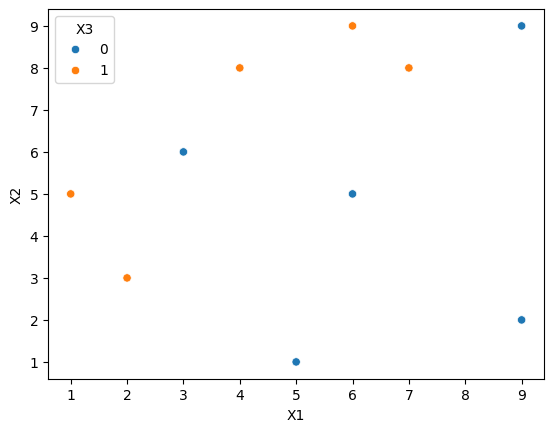

In [39]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['X3'])

In [40]:
df['weights']=1/df.shape[0]
'''
weight=1/row_numbres
'''


'\nweight=1/row_numbres\n'

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier(max_depth=1)#decision stumps
X=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [42]:
#step2- Train first model
dt1.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.625, 0.5, '  False')]

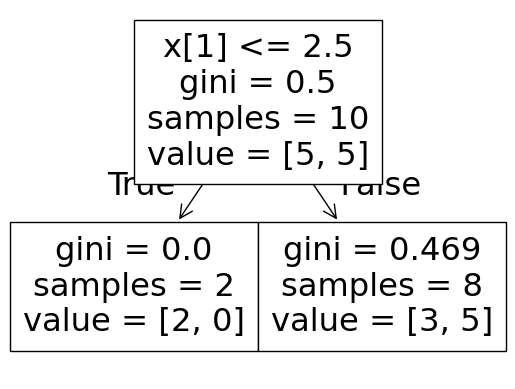

In [43]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

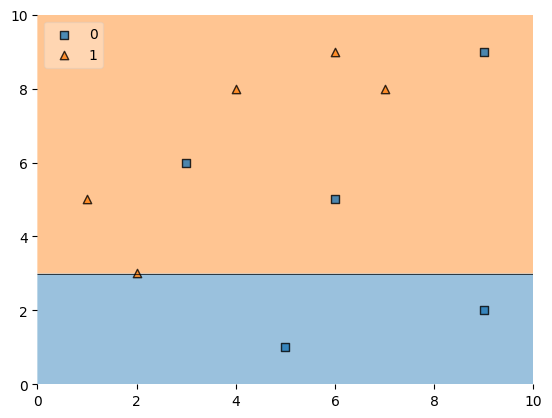

In [44]:
plot_decision_regions(X,y,clf=dt1,legend=2)

In [45]:
df['y_pred']=dt1.predict(X)#finding the predection of the values using the first decision stumps

In [46]:
df

,X1,X2,X3,weights,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
4,5,1,0,0.1,0
5,6,9,1,0.1,1
6,6,5,0,0.1,1
7,7,8,1,0.1,1
8,9,9,0,0.1,1
9,9,2,0,0.1,0


In [47]:
def calculate_model_weight(error):#calculating the weight
    ''' 
    formula is 
    error=0.5*ln(1-error/error)
    '''
    return 0.5*np.log((1-error)/error+0.0000001)


In [48]:
#step3-calculating model weight
alpha1=calculate_model_weight(0.3)
alpha1

np.float64(0.42364895162217275)

In [72]:
#step4-update weights
def update_row_weights(row,alpha=1.09):
    if row['X3']==row['y_pred']:
        return row['weights']*np.exp(-alpha)
    else:
        return row['weights']*np.exp(alpha)
    '''
    The exponentail function allows for the better model to 
    give high weight to incorrectly classified data.
    The bad model will take very large time.
    '''

In [50]:
df['updated_weight']=df.apply(update_row_weights,axis=1)

In [51]:
df

,X1,X2,X3,weights,y_pred,updated_weight
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,1,0.152653
3,4,8,1,0.1,1,0.065508
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,1,0.065508
6,6,5,0,0.1,1,0.152653
7,7,8,1,0.1,1,0.065508
8,9,9,0,0.1,1,0.152653
9,9,2,0,0.1,0,0.065508


In [52]:
df['updated_weight'].sum()

np.float64(0.9165153319682015)

In [53]:
df['noramlized_weight']=df['updated_weight']/df['updated_weight'].sum()

In [54]:
df

,X1,X2,X3,weights,y_pred,updated_weight,noramlized_weight
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,1,0.152653,0.166559
3,4,8,1,0.1,1,0.065508,0.071475
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,1,0.065508,0.071475
6,6,5,0,0.1,1,0.152653,0.166559
7,7,8,1,0.1,1,0.065508,0.071475
8,9,9,0,0.1,1,0.152653,0.166559
9,9,2,0,0.1,0,0.065508,0.071475


In [55]:
df['noramlized_weight'].sum()

np.float64(1.0)

In [56]:
df['cumsum_upper']=np.cumsum(df['noramlized_weight'])#to calcualte the upper range of the normalized weight
df['cumsum_lower']=df['cumsum_upper']-df['noramlized_weight']#lower range of the normalized weight


In [57]:
df

,X1,X2,X3,weights,y_pred,updated_weight,noramlized_weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065508,0.071475,0.071475,0.000000
1,2,3,1,0.1,1,0.065508,0.071475,0.142950,0.071475
2,3,6,0,0.1,1,0.152653,0.166559,0.309508,0.142950
3,4,8,1,0.1,1,0.065508,0.071475,0.380983,0.309508
4,5,1,0,0.1,0,0.065508,0.071475,0.452458,0.380983
5,6,9,1,0.1,1,0.065508,0.071475,0.523933,0.452458
6,6,5,0,0.1,1,0.152653,0.166559,0.690492,0.523933
7,7,8,1,0.1,1,0.065508,0.071475,0.761967,0.690492
8,9,9,0,0.1,1,0.152653,0.166559,0.928525,0.761967
9,9,2,0,0.1,0,0.065508,0.071475,1.000000,0.928525


In [58]:
import random#for the random number generation

In [59]:
def create_new_dataset(df):
    row = df.shape[0]
    x_list = [random.random() for _ in range(row)]  # Generate random numbers between 0 and 1
    indices = []
    for num in x_list:
        for i in range(len(df)):
            if num >= df.iloc[i]['cumsum_lower'] and num < df.iloc[i]['cumsum_upper']:
                indices.append(i)
                break  # Add break to avoid duplicate indices
    return indices

In [60]:
index_values=create_new_dataset(df)

In [61]:
index_values

[6, 2, 5, 6, 8, 6, 2, 1, 3, 4]

In [62]:
second_df=df.iloc[index_values,[0,1,2,3]]#created new dataset


In [63]:
second_df#the weights will be reintialized in the new dataset

,X1,X2,X3,weights
6,6,5,0,0.1
2,3,6,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
8,9,9,0,0.1
6,6,5,0,0.1
2,3,6,0,0.1
1,2,3,1,0.1
3,4,8,1,0.1
4,5,1,0,0.1


In [64]:
X=second_df.iloc[:,0:2].values
y=second_df.iloc[:,2].values

In [65]:
dt2=DecisionTreeClassifier(max_depth=1)

In [66]:
dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[1] <= 7.0\ngini = 0.42\nsamples = 10\nvalue = [7, 3]'),
 Text(0.25, 0.25, 'gini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.625, 0.5, '  False')]

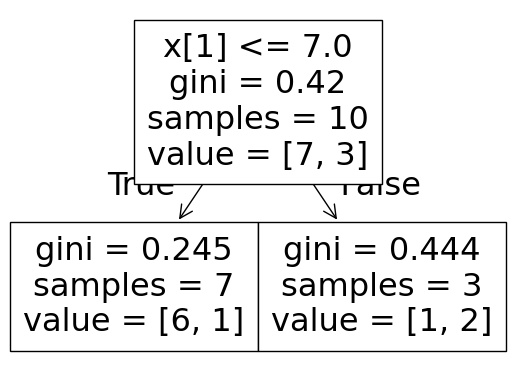

In [67]:
plot_tree(dt2)

<Axes: >

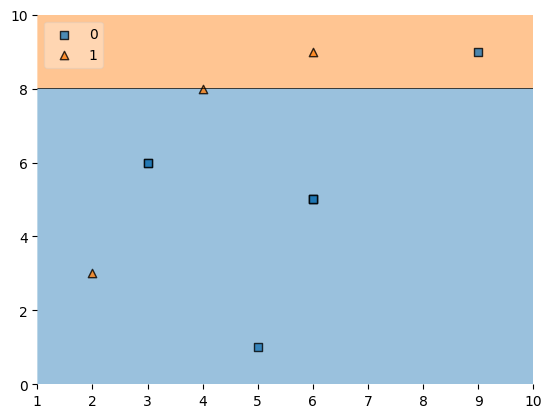

In [68]:
plot_decision_regions(X,y,clf=dt2,legend=2)#plotting decision tree for the decision tree boundaries

In [69]:
alpha2=calculate_model_weight(0.1)

In [70]:
alpha2

np.float64(1.0986122942236651)

In [74]:
second_df['updated_weight']=second_df.apply(update_row_weights,axis=1)

KeyError: 'y_pred'